# **<u>Unlocking Financial Inclusion in East Africa: A Data-Driven Approach </u>**

## Introduction:


In the realm of traditional banking in African Countries, the quest for expansion is met with the practical challenge of identifying suitable locations for new branches. Grounded in this reality, our endeavor seeks to leverage data analysis to obtain opportunities for growth and enhance financial accessibility across the continent.


## Problem Statement:


The lack of financial inclusion in East Africa poses significant challenges to economic development and individual prosperity. In order to address this issue effectively, we aim to build a predictive model that can identify individuals without bank accounts. By leveraging various features such as demographic information, access to financial services, employment status, and education level, our model seeks to provide insights into the factors influencing financial inclusion. Ultimately, this model can assist policymakers, financial institutions, and NGOs in targeting interventions and initiatives to promote greater financial access and inclusion in the region.

## Objectives:


1. Geographic Analysis: Mapping regions with high demand for banking services across African countries.




2. Demographic Profiling: Understanding the demographic characteristics of target audiences, including age, income, and occupation.




3. Accessibility Assessment: Evaluating the accessibility of banking services by considering factors such as distance to existing branches and transportation infrastructure.




4. Employment Analysis: Examining employment trends in areas lacking bank branches to inform strategies for addressing economic needs and enhancing financial inclusion.


### DATA CLEANING

Importing Libraries used:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Loading datasets into variables:

In [2]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')


Looking at the first five rows on the training set

In [3]:
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


Checking for null values:

In [4]:
print('missing Values:',train.isnull().sum())

missing Values: country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64


Looking at the data types for the predictors to switch the object type to int type used in machine learning:

In [5]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB
None


Looking at the unique values in each column:

In [6]:

unique_values = {}
for column in train.columns:
    unique_values[column] = train[column].unique()

for column, values in unique_values.items():
    print(f"Unique values for '{column}': {values}")


Unique values for 'country': ['Kenya' 'Rwanda' 'Tanzania' 'Uganda']
Unique values for 'year': [2018 2016 2017]
Unique values for 'uniqueid': ['uniqueid_1' 'uniqueid_2' 'uniqueid_3' ... 'uniqueid_8757'
 'uniqueid_8758' 'uniqueid_8759']
Unique values for 'bank_account': ['Yes' 'No']
Unique values for 'location_type': ['Rural' 'Urban']
Unique values for 'cellphone_access': ['Yes' 'No']
Unique values for 'household_size': [ 3  5  8  7  1  6  4 10  2 11  9 12 16 15 13 14 21 18 17 20]
Unique values for 'age_of_respondent': [ 24  70  26  34  32  42  54  76  40  69  64  31  38  47  27  48  25  21
  18  22  58  55  62  29  35  45  67  19  80  66  50  33  28  51  16  17
  30  37  59  65  46  56  52  23  43  49  44  72  53  63  39  81  78  36
  20  60  95  71  57  85  68  41  61  75  86  73  93  74  88  90  77  84
  82  89  79  83  94  87  92  91  98  97  96  99 100]
Unique values for 'gender_of_respondent': ['Female' 'Male']
Unique values for 'relationship_with_head': ['Spouse' 'Head of Househol

### EXPLORATORY DATA ANALYSIS

Printing graphs of each column against its unique values:

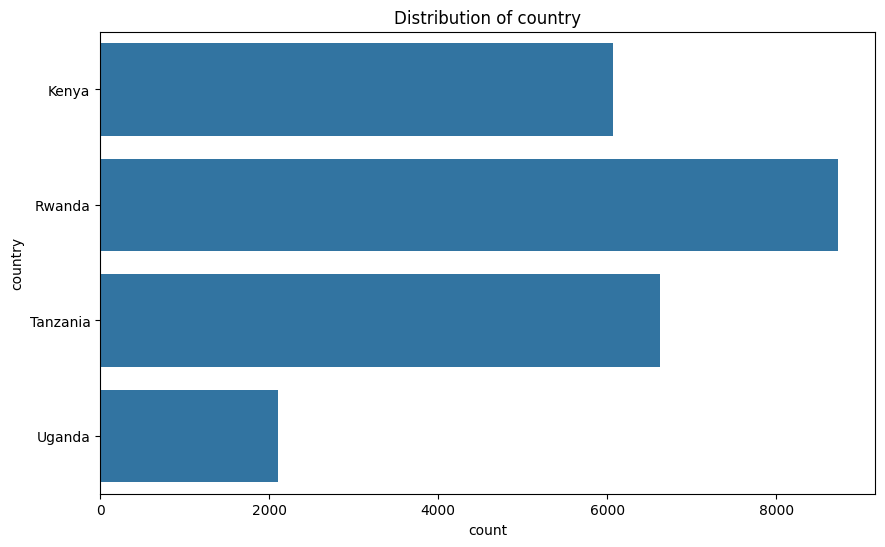

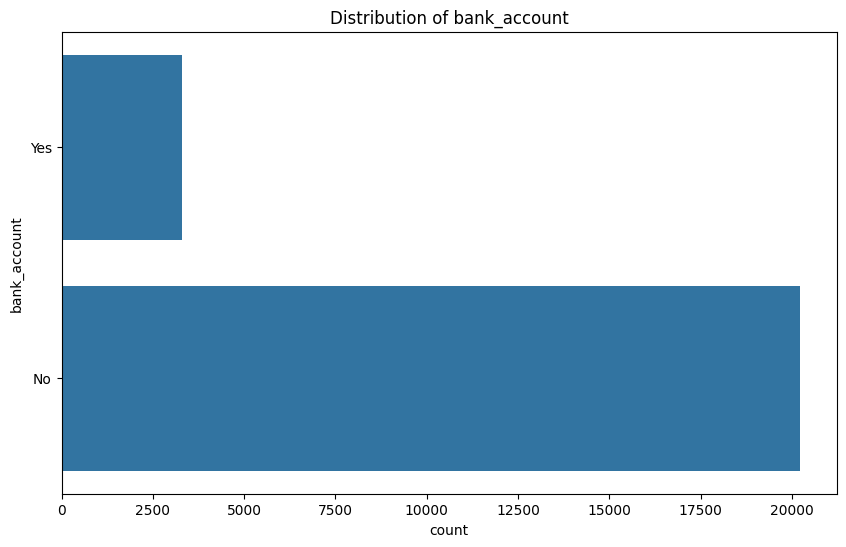

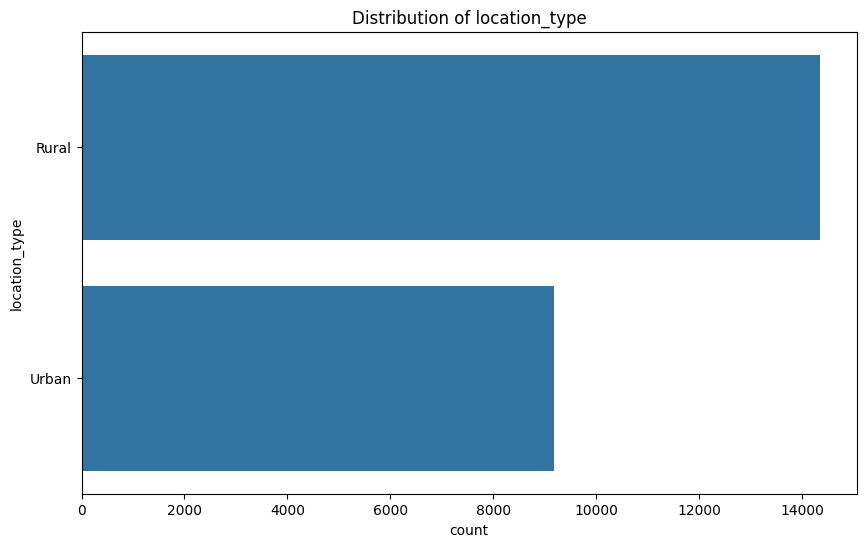

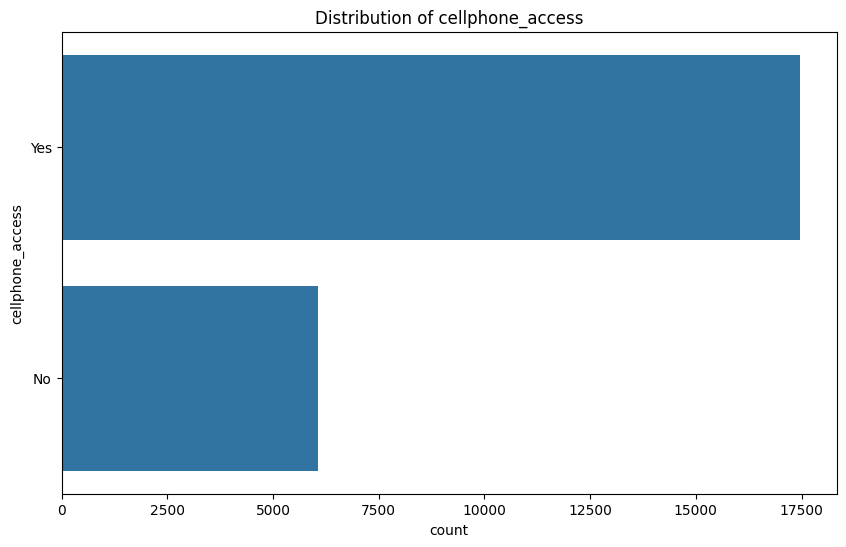

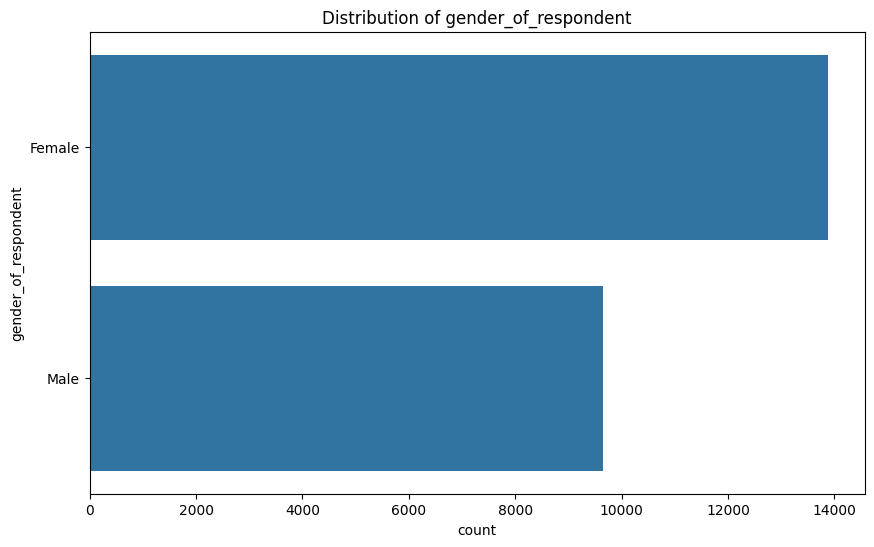

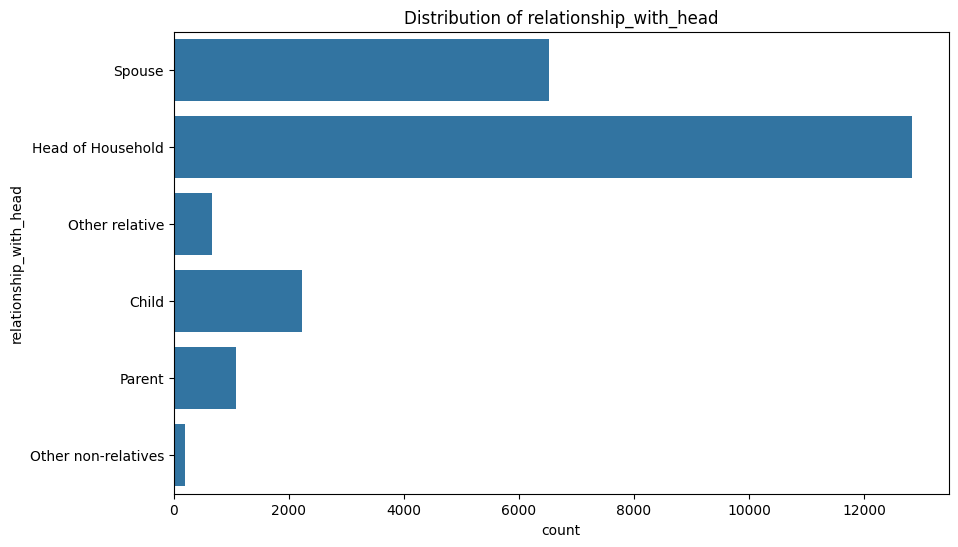

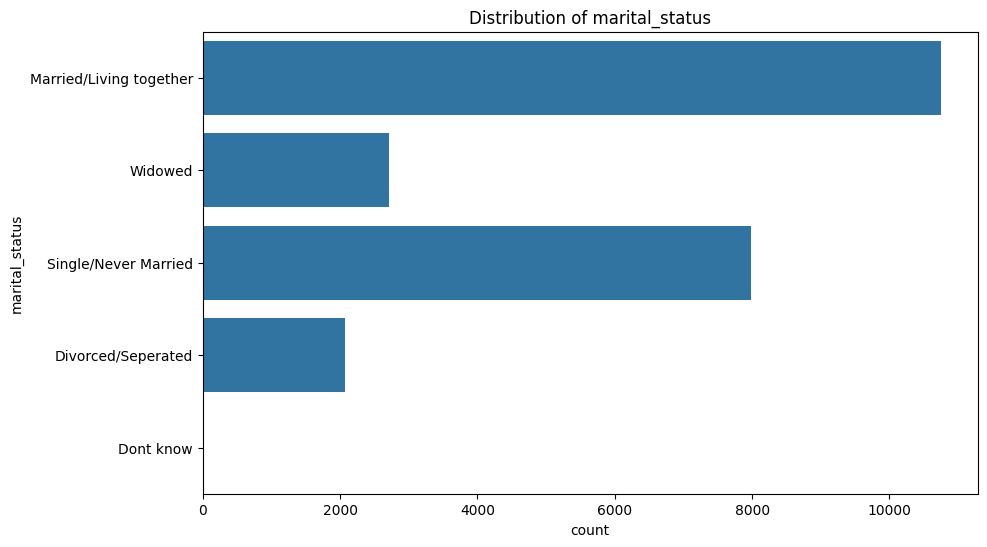

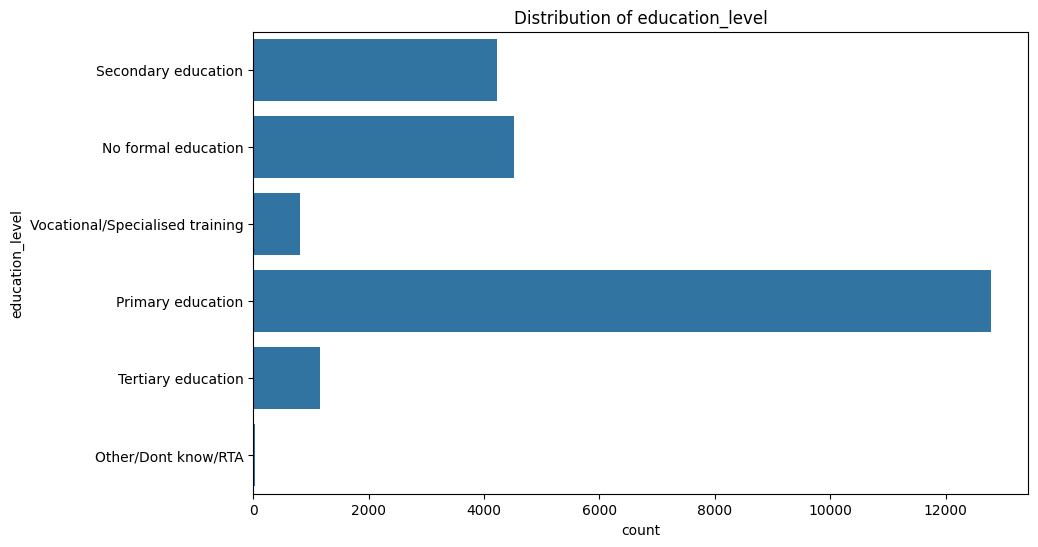

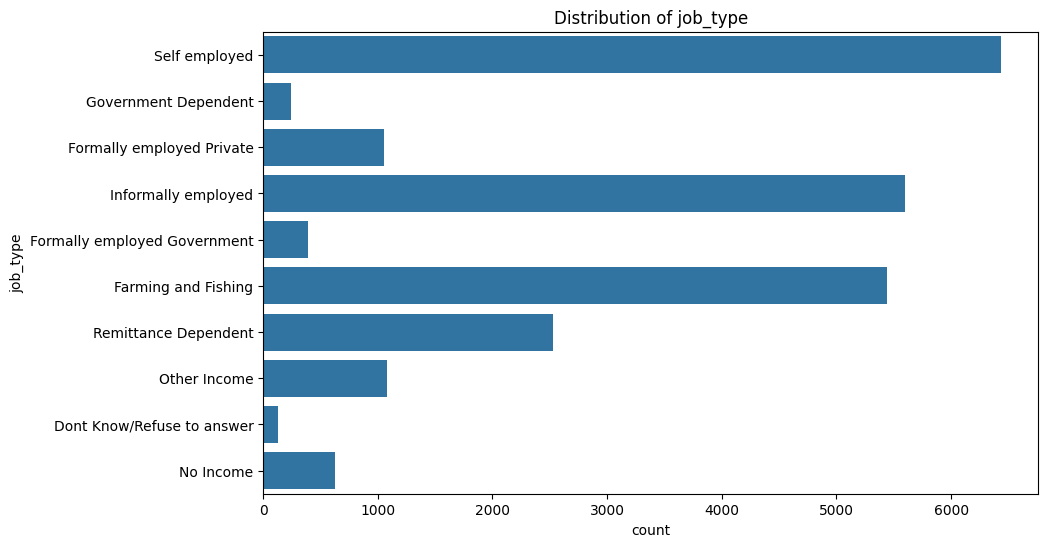

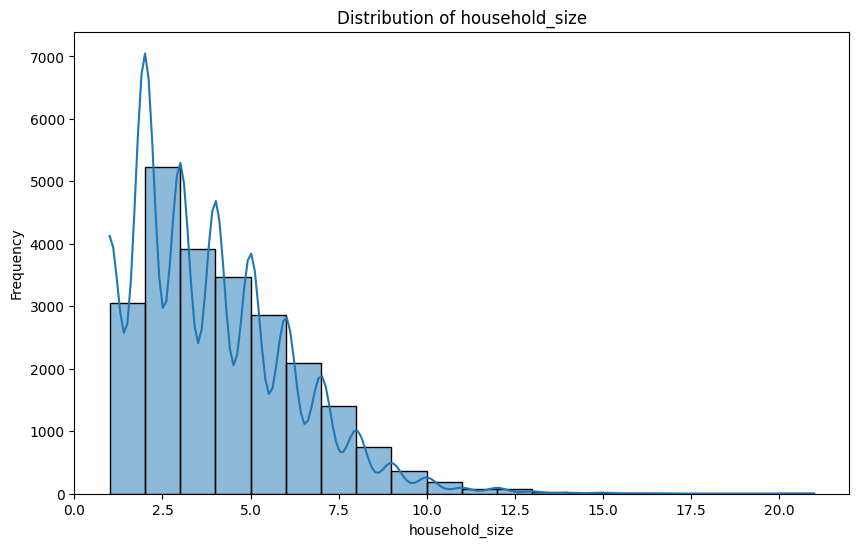

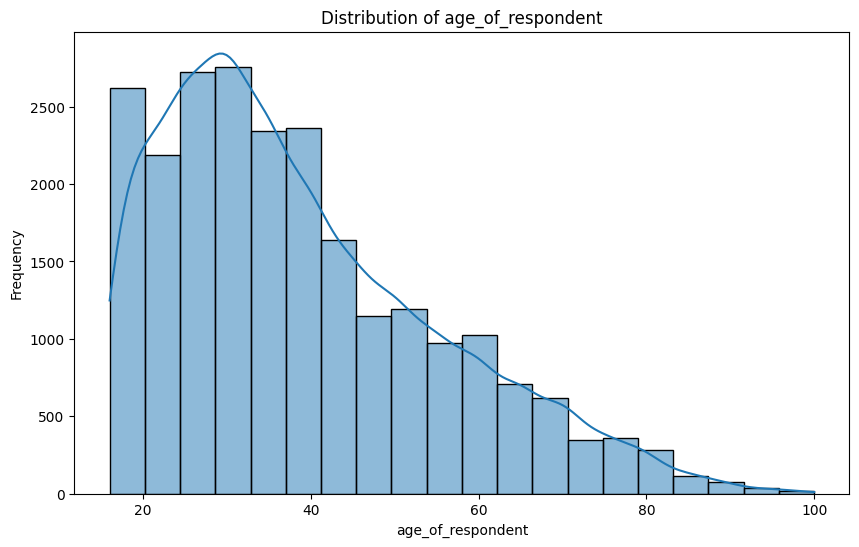

In [7]:
categorical_variables = ['country', 'bank_account', 'location_type', 'cellphone_access',
                         'gender_of_respondent', 'relationship_with_head', 'marital_status',
                         'education_level', 'job_type']

for column in categorical_variables:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=train, y=column)
    plt.title(f'Distribution of {column}')
    plt.show()


numerical_variables = ['household_size', 'age_of_respondent']

for column in numerical_variables:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=train, x=column, bins=20, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


Making stacked bar graph of the columns against its unique values:

<Figure size 1000x600 with 0 Axes>

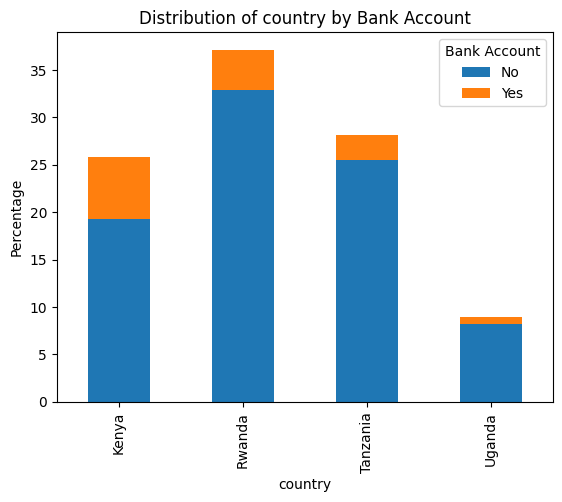

<Figure size 1000x600 with 0 Axes>

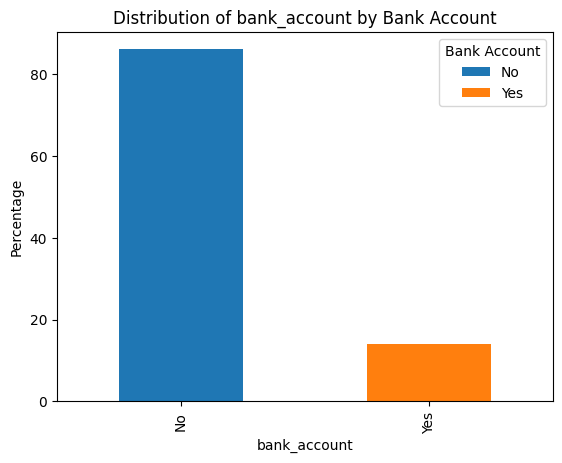

<Figure size 1000x600 with 0 Axes>

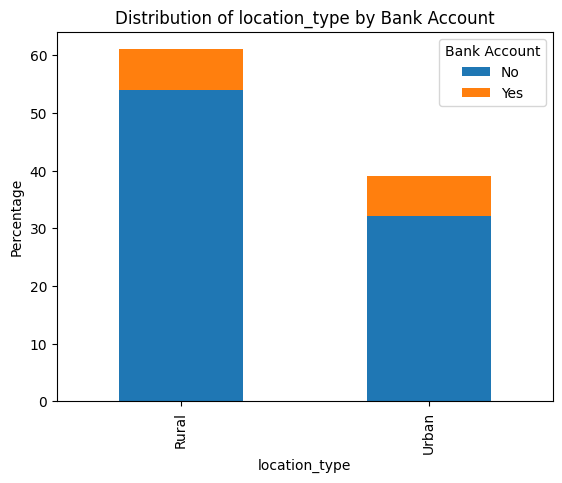

<Figure size 1000x600 with 0 Axes>

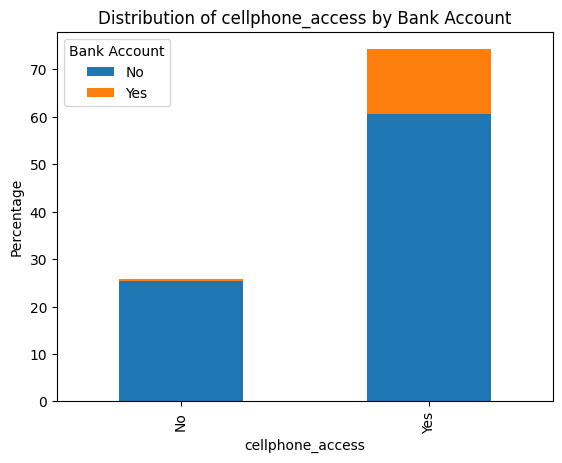

<Figure size 1000x600 with 0 Axes>

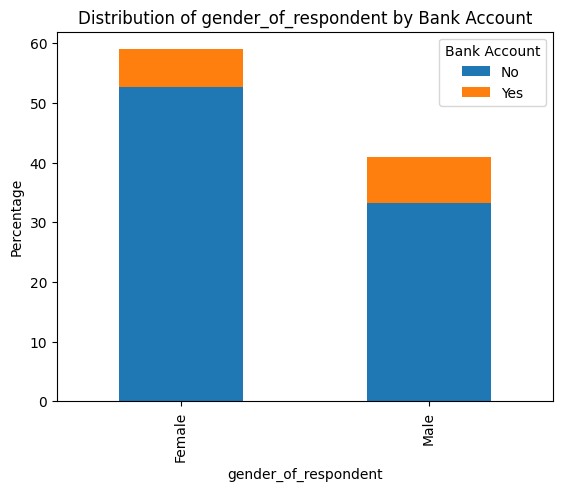

<Figure size 1000x600 with 0 Axes>

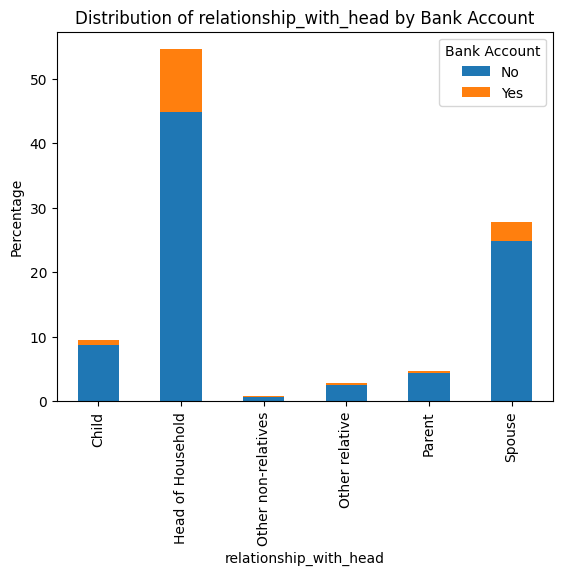

<Figure size 1000x600 with 0 Axes>

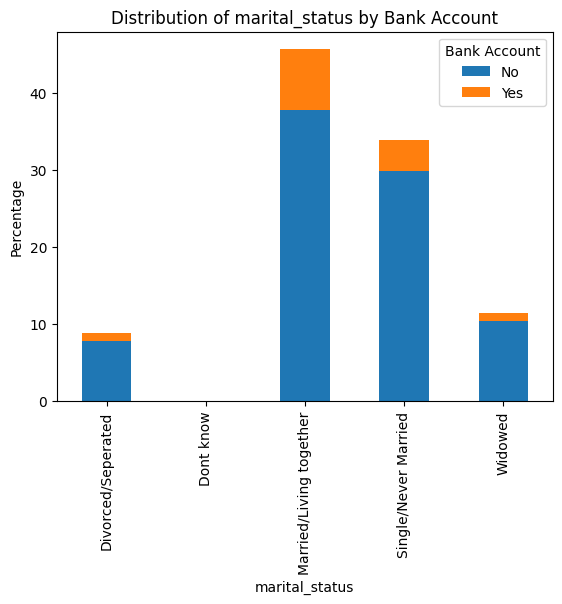

<Figure size 1000x600 with 0 Axes>

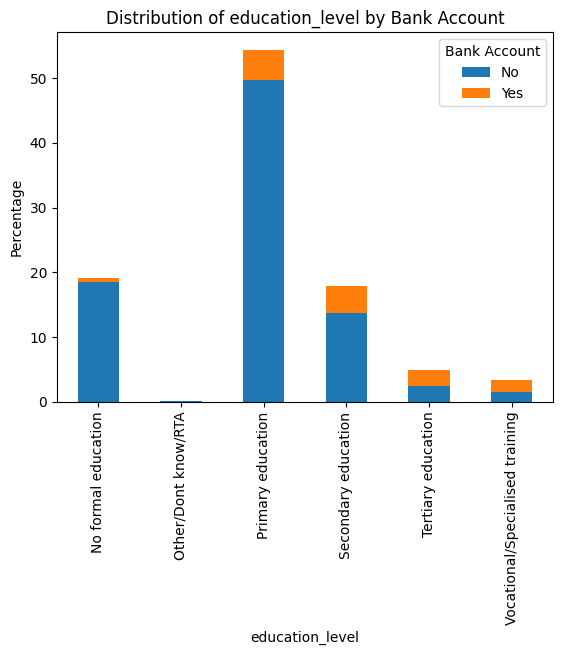

<Figure size 1000x600 with 0 Axes>

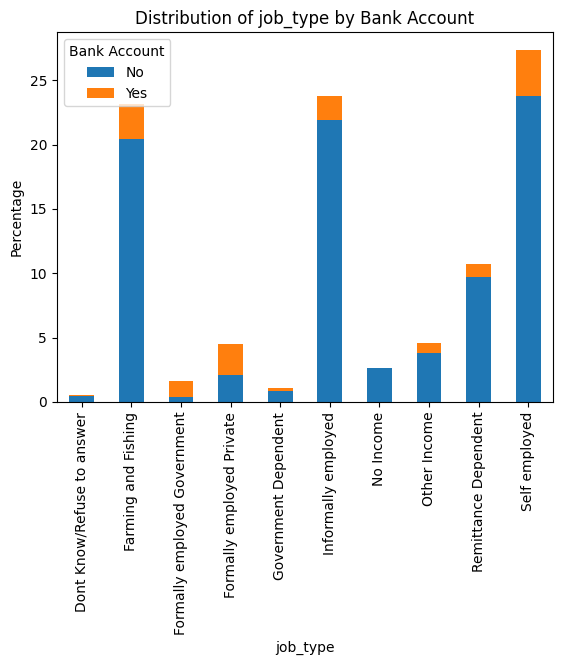

In [8]:
# Categorical variables
for column in categorical_variables:
    plt.figure(figsize=(10, 6))
    # Compute percentage of each category within the 'bank_account' groups
    percentages = train.groupby([column, 'bank_account']).size().unstack().div(len(train)).mul(100)
    percentages.plot(kind='bar', stacked=True)
    plt.title(f'Distribution of {column} by Bank Account')
    plt.xlabel(column)
    plt.ylabel('Percentage')
    plt.legend(title='Bank Account')
    plt.show()


Looking at the percentages for the bank accounts across different columns in the dataset

In [9]:
percentages_string = ""

# Categorical variables
for column in categorical_variables:
    # Compute percentage of each category within the 'bank_account' groups
    percentages = train.groupby([column, 'bank_account']).size().unstack().div(len(train)).mul(100)
    percentages_string += f"\n{column}:\n"
    percentages_string += percentages.to_string() + "\n\n"

print(percentages_string)



country:
bank_account         No       Yes
country                          
Kenya         19.329196  6.465737
Rwanda        32.868560  4.263731
Tanzania      25.561129  2.580343
Uganda         8.161877  0.769427


bank_account:
bank_account         No        Yes
bank_account                      
No            85.920762        NaN
Yes                 NaN  14.079238


location_type:
bank_account          No       Yes
location_type                     
Rural          53.868390  7.103384
Urban          32.052372  6.975854


cellphone_access:
bank_account             No        Yes
cellphone_access                      
No                25.361333   0.442102
Yes               60.559429  13.637137


gender_of_respondent:
bank_account                 No       Yes
gender_of_respondent                     
Female                52.690869  6.299949
Male                  33.229893  7.779289


relationship_with_head:
bank_account                   No       Yes
relationship_with_head             

Dropped the columns that didnt provide any meaningful information to be used in the dataset ie uniqueid

In [10]:
train.drop(['uniqueid'], axis=1, inplace=True)

In [11]:
test1 = test.drop(['uniqueid'], axis=1)

Checked out the first 5 rows:

In [12]:
train.head()

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


## DATA PREPROCESSING

Converting all the boolean type columns from yes and no to numeric 1,0:

In [13]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
le = LabelEncoder()

# Convert the target label to numerical data
train['bank_account'] = le.fit_transform(train['bank_account'])

def preprocessing_data(data):
    # Convert the following numerical labels from integer to float
    float_array = data[["household_size", "age_of_respondent"]].values.astype(float)
    
    # Categorical features to be converted to One Hot Encoding
    categ = ["relationship_with_head", "marital_status", "education_level", "job_type", "country"]
    
    # One Hot Encoding conversion
    data = pd.get_dummies(data, prefix_sep="_", columns=categ)
    
    # Convert boolean columns to integers (1 and 0)
    boolean_columns = ["relationship_with_head_Other non-relatives", "job_type_Government Dependent", 
                       "job_type_Informally employed", "job_type_No Income", "job_type_Other Income",
                       "job_type_Remittance Dependent", "job_type_Self employed", "country_Kenya",
                       "country_Rwanda", "country_Tanzania", "country_Uganda"]
    
    # Convert boolean columns to integers
    data[boolean_columns] = data[boolean_columns].astype(int)
    
    # Convert remaining boolean columns to integers
    boolean_columns_remaining = [col for col in data.columns if data[col].dtype == bool]
    data[boolean_columns_remaining] = data[boolean_columns_remaining].astype(int)
    
    # Convert remaining categorical columns to numerical using Label Encoder
    data["location_type"] = le.fit_transform(data["location_type"])
    data["cellphone_access"] = le.fit_transform(data["cellphone_access"])
    data["gender_of_respondent"] = le.fit_transform(data["gender_of_respondent"])
    
    return data

# Preprocess the 'train' DataFrame
train_preprocessed = preprocessing_data(train)


Looked at the columns for the training and testing dataset:

In [14]:
print(train.columns)
print(test.columns)


Index(['country', 'year', 'bank_account', 'location_type', 'cellphone_access',
       'household_size', 'age_of_respondent', 'gender_of_respondent',
       'relationship_with_head', 'marital_status', 'education_level',
       'job_type'],
      dtype='object')
Index(['country', 'year', 'uniqueid', 'location_type', 'cellphone_access',
       'household_size', 'age_of_respondent', 'gender_of_respondent',
       'relationship_with_head', 'marital_status', 'education_level',
       'job_type'],
      dtype='object')


In [15]:
train = preprocessing_data(train)
test1 = preprocessing_data(test1) 

In [16]:
train.head()

,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,...,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda
0,2018,1,0,1,3,24,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,2018,0,0,0,5,70,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
2,2018,1,1,1,5,26,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3,2018,0,0,1,5,34,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,2018,0,1,0,8,26,1,1,0,0,...,0,1,0,0,0,0,1,0,0,0


In [17]:
test1.shape

(10086, 37)

In [18]:
train.shape

(23524, 38)

Split the training set into X features and y target(bank account):

In [19]:
#Separate training features from target
X_train = train.drop(['bank_account'], axis=1)
y_train = train['bank_account']

Looking at the value counts for the target variable

In [20]:
y_train.value_counts()

bank_account
0    20212
1     3312
Name: count, dtype: int64

<Axes: ylabel='count'>

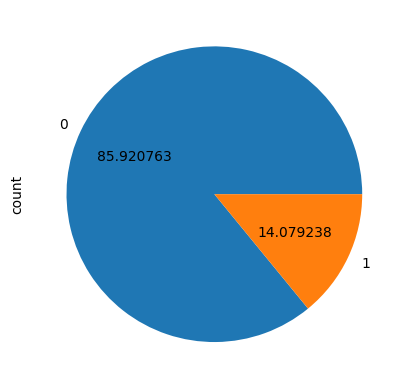

In [21]:
y_train.value_counts().plot.pie(autopct = '%2f')

Observing a huge class imbalance on our data so using smote would fix such an imbalance hence below smote on the dataset to remove the class imbalance:

In [22]:
# handling the inbalanced data

from collections import Counter 
from imblearn.over_sampling import SMOTE

smote = SMOTE()

#fit predictor and target variable

X_smote, y_smote = smote.fit_resample(X_train,y_train)

print('original dataset shape', Counter(y_train))
print('resample dataset shape', Counter(y_smote))


original dataset shape Counter({0: 20212, 1: 3312})
resample dataset shape Counter({1: 20212, 0: 20212})


Observing the value counts for the target variable after smote:

<Axes: ylabel='count'>

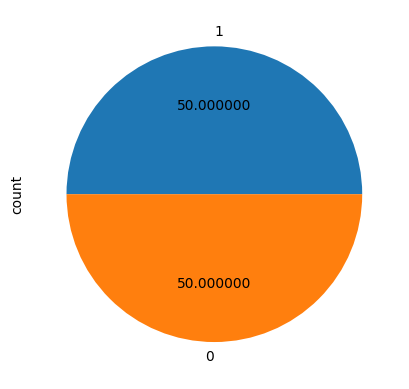

In [23]:
y_smote.value_counts().plot.pie(autopct = '%2f')

From the plot above, we can see the data has been balanced

## MODEL TRAINING

Getting into model training using KNN,Decision Trees,Logistics Regression and Naive Bayes and picking the best performing model

Created the X and y values

In [24]:
#define X and y
X = train.drop('bank_account', axis = 1)
y = train['bank_account']

X

,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,...,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda
0,2018,0,1,3,24,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,2018,0,0,5,70,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
2,2018,1,1,5,26,1,0,0,0,1,...,0,0,0,0,0,1,1,0,0,0
3,2018,0,1,5,34,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2018,1,0,8,26,1,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,2018,0,1,4,48,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
23520,2018,0,1,2,27,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
23521,2018,0,1,5,27,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
23522,2018,1,1,7,30,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


Normalized and scaled all the data for uniformity:

In [25]:
from sklearn.preprocessing import StandardScaler
#scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#check the scaled features
X_scaled

array([[ 1.20854126, -0.80006449,  0.58972136, ..., -0.76853217,
        -0.62579812, -0.31316476],
       [ 1.20854126, -0.80006449, -1.69571609, ..., -0.76853217,
        -0.62579812, -0.31316476],
       [ 1.20854126,  1.24989924,  0.58972136, ..., -0.76853217,
        -0.62579812, -0.31316476],
       ...,
       [ 1.20854126, -0.80006449,  0.58972136, ..., -0.76853217,
        -0.62579812,  3.19320733],
       [ 1.20854126,  1.24989924,  0.58972136, ..., -0.76853217,
        -0.62579812,  3.19320733],
       [ 1.20854126, -0.80006449,  0.58972136, ..., -0.76853217,
        -0.62579812,  3.19320733]])

Train Test Split:

In [26]:
#Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16466, 37), (7058, 37), (16466,), (7058,))

## KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
#Instantiate the KNN classifier
knn = KNeighborsClassifier()
#Train the model
knn.fit(X_smote, y_smote)


KNeighborsClassifier()

In [28]:
#Make predictions
y_pred = knn.predict(X_test)
#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


c:\Users\ronal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Accuracy: 0.6133465570983282


Our training model attained an accuracy of 84% on unseen data. Let's see wether we can improve this accuracy while avoiding overfitting.

**Hyperparameter Tunning**

In [29]:
from sklearn.model_selection import GridSearchCV

#define the parameter grid
param_grid = {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance'], 'p': [1, 2]}

#instantiate the KNN classifier
knn = KNeighborsClassifier()

#instantiate GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

#perform grid search on the training data
grid_search.fit(X_train, y_train)

#get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)



Best Hyperparameters: {'n_neighbors': 11, 'p': 1, 'weights': 'uniform'}


Using the above parameters in out model.

In [30]:
#use the best model for prediction
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

#evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8826863134032303


We can see after tunning our model, the accuracy increased to 88% which is better than the untunned model. We can also evaluate the model using other metrics such as;

In [31]:
from sklearn.metrics import classification_report

#calculate precision, recall, and F1-score
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      6073
           1       0.65      0.35      0.45       985

    accuracy                           0.88      7058
   macro avg       0.78      0.66      0.69      7058
weighted avg       0.87      0.88      0.87      7058



We can see that the model does an incedidible job in classifying those without bank accounts. The precision for class 0 (those without bank accounts) is 0.90, indicating that 90% of the instances predicted as class 0 are actually class 0. Similarly, the precision for class 1 (those with bank accounts) is 0.65, meaning that 65% of the instances predicted as class 1 are actually class 1. The recall for class 0 is 0.97, indicating that 97% of the actual class 0 instances are correctly identified by the model. The recall for class 1 is 0.35, meaning that only 35% of the actual class 1 instances are correctly identified. The F1-score ranges from 0 to 1, where a higher score indicates better performance. In our model, the F1-score for class 0 is 0.93, while the F1-score for class 1 is 0.45.

Visualizing the the metrics

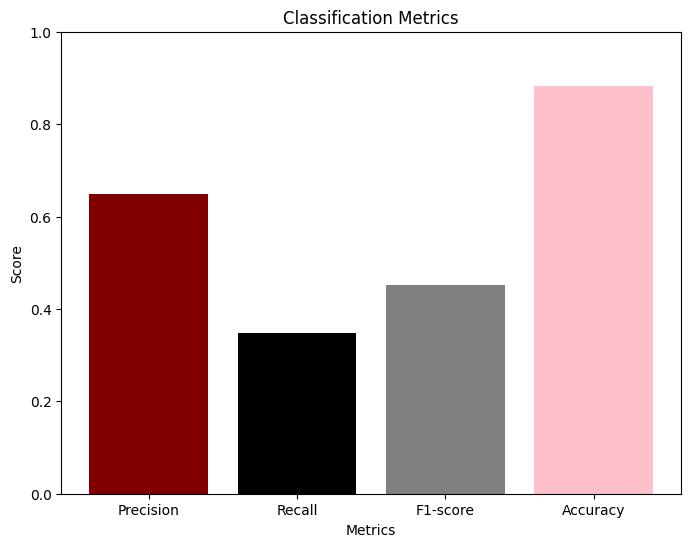

In [32]:
import numpy as np

#calculate the metrics
report_dict = classification_report(y_test, y_pred, output_dict=True)
precision = report_dict['1']['precision']
recall = report_dict['1']['recall']
f1_score = report_dict['1']['f1-score']
accuracy = accuracy_score(y_test, y_pred)

#plot bar graph
metrics = ['Precision', 'Recall', 'F1-score', 'Accuracy']
values = [precision, recall, f1_score, accuracy]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['maroon', 'black', 'grey', 'pink'])
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Classification Metrics')
plt.ylim(0, 1) 
plt.show()


In [33]:
#scale the features using StandardScaler
scaler = StandardScaler()
test_scaled = scaler.fit_transform(test1)

#check the scaled features
test_scaled

array([[ 1.20863498,  1.26021614,  0.57818983, ..., -0.7685056 ,
        -0.625898  , -0.31320077],
       [ 1.20863498,  1.26021614,  0.57818983, ..., -0.7685056 ,
        -0.625898  , -0.31320077],
       [ 1.20863498, -0.79351467, -1.72953578, ..., -0.7685056 ,
        -0.625898  , -0.31320077],
       ...,
       [ 1.20863498,  1.26021614,  0.57818983, ..., -0.7685056 ,
        -0.625898  ,  3.19284021],
       [ 1.20863498, -0.79351467,  0.57818983, ..., -0.7685056 ,
        -0.625898  ,  3.19284021],
       [ 1.20863498,  1.26021614,  0.57818983, ..., -0.7685056 ,
        -0.625898  ,  3.19284021]])

In [34]:
#evaluating the model on the test dataset
knn = KNeighborsClassifier()
#train the model
knn.fit(X_smote, y_smote)

Model_pred = knn.predict(test_scaled)
Model_pred

c:\Users\ronal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1, 1, 0, ..., 1, 0, 0])

The Model_pred array contains the predicted class labels for each instance in the test dataset. These labels are assigned by the KNN model based on its learned patterns from the training data. Each element in the array corresponds to one instance in the test dataset, indicating whether the model predicts that instance to belong to class 0 or class 1 in a binary classification scenario. This information is essential for evaluating the model's performance and comparing its predictions with the true class labels to assess its accuracy and effectiveness.

## Decision Trees:

              precision    recall  f1-score   support

           0       0.89      0.88      0.88      6056
           1       0.88      0.89      0.89      6072

    accuracy                           0.89     12128
   macro avg       0.89      0.89      0.89     12128
weighted avg       0.89      0.89      0.89     12128



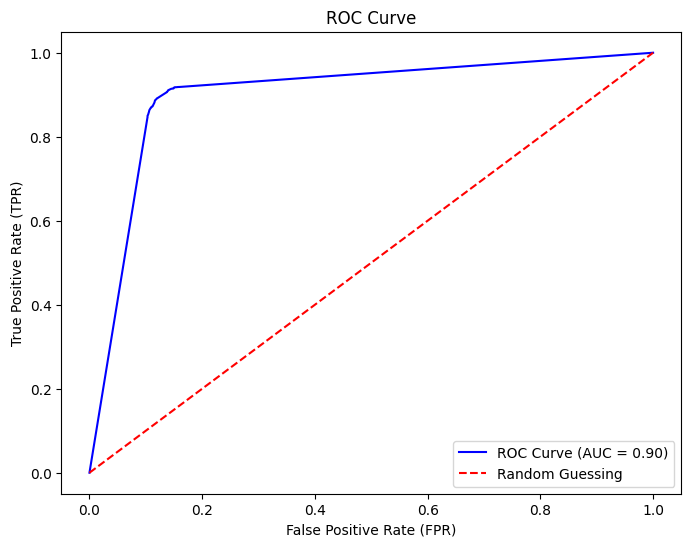

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,roc_auc_score,roc_curve
X_Train,X_Test,y_Train,y_Test = train_test_split(X_smote,y_smote,test_size=0.3,random_state=42)
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_Train,y_Train)
y_pred = dt.predict(X_Test)
y_probs = dt.predict_proba(X_Test)[:,1]
dt_classification_report = classification_report(y_Test,y_pred)
print(dt_classification_report)
fpr,tpr,thresholds = roc_curve(y_Test,y_probs)
auc = roc_auc_score(y_Test,y_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()



### HyperParameter Tuning Decision Trees:

In [36]:
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_Train, y_Train)
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
best_dt = grid_search.best_estimator_
accuracy = best_dt.score(X_Test, y_Test)
print("Test Accuracy with Hypertunes Model:", accuracy)


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Test Accuracy with Hypertunes Model: 0.88563654353562


# Logistic Regression

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_smote,y_smote, test_size = 0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((28296, 37), (12128, 37), (28296,), (12128,))

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [39]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='saga', penalty='l2', C=1.0, max_iter=1000)

logreg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, solver='saga')

# Predictions

In [40]:
from sklearn.metrics import accuracy_score, classification_report

y_hat_train = logreg.predict(X_train_scaled)
y_hat_train

array([1, 0, 0, ..., 1, 1, 0])

In [41]:
y_hat_test = logreg.predict(X_test_scaled)
y_hat_test 

array([1, 0, 1, ..., 0, 0, 1])

### How many times was the classifier correct on the training set

In [42]:
train_residuals = np.abs(y_train - y_hat_train)
print(pd.Series(train_residuals, name="Residuals training (counts)").value_counts())
print()
print(pd.Series(train_residuals, name="Residuals training (proportions)").value_counts(normalize=True))

Residuals training (counts)
0    24853
1     3443
Name: count, dtype: int64

Residuals training (proportions)
0    0.878322
1    0.121678
Name: proportion, dtype: float64


### How many times was the classifier correct on the test set

In [43]:
test_residuals = np.abs(y_test - y_hat_test)
print(pd.Series(train_residuals, name="Residuals test (counts)").value_counts())
print()
print(pd.Series(train_residuals, name="Residuals test (proportions)").value_counts(normalize=True))

Residuals test (counts)
0    24853
1     3443
Name: count, dtype: int64

Residuals test (proportions)
0    0.878322
1    0.121678
Name: proportion, dtype: float64


This shows the proprtion of the data points in both the training and test data. Majority of the residual data points have a value of 0. 0 represents do not have a bank account

### Evaluating LogisticRegression Model

In [44]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

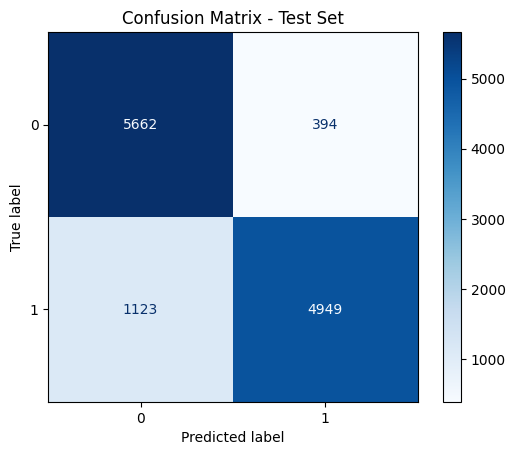

In [45]:
# Plot confusion matrix of the test set 
cm = confusion_matrix(y_test, y_hat_test)
cm_display = ConfusionMatrixDisplay(cm, display_labels=logreg.classes_)
cm_display.plot(cmap='Blues')
plt.title('Confusion Matrix - Test Set')
plt.show()

True Positive(1,1) = The model correctly predicted that 4989 individuals qualify for a bank account and indeed they do.

True Negative(0,0) = The model correctly predicted that 5660 individuals do not qualify for a bank account and indeed they do not.

False Positive(1,0) = The model predicted that 1083 individuals qualify for a bank account but they do not qualify to open a bank account. The model approved unqualified applicants.

False Negative(0,1) =  The model predicted that 396 individuals do not qualify for a bank account but they do  qualify to open a bank account. The model rejected qualified applicants.

In [46]:
#evaluating the model's performance on the training data 
precision_train_sklearn = precision_score(y_train, y_hat_train)
recall_train_sklearn = recall_score(y_train, y_hat_train)
accuracy_train_sklearn = accuracy_score(y_train, y_hat_train)
f1_train_sklearn = f1_score(y_train, y_hat_train)

#evaluating the model's performance on the testing data 

precision_test_sklearn = precision_score(y_test, y_hat_test)
recall_test_sklearn = recall_score(y_test, y_hat_test)
accuracy_test_sklearn = accuracy_score(y_test, y_hat_test)
f1_test_sklearn = f1_score(y_test, y_hat_test)

In [47]:
print("Sklearn functions - Training set metrics:")
print("Precision:", precision_train_sklearn)
print("Recall:", recall_train_sklearn)
print("Accuracy:", accuracy_train_sklearn)
print("F1 Score:", f1_train_sklearn)
print()
print("Sklearn functions - Testing set metrics:")
print("Precision:", precision_test_sklearn)
print("Recall:", recall_test_sklearn)
print("Accuracy:", accuracy_test_sklearn)
print("F1 Score:", f1_test_sklearn)

Sklearn functions - Training set metrics:
Precision: 0.925463368069366
Recall: 0.8227722772277227
Accuracy: 0.8783220243143908
F1 Score: 0.8711017932686907

Sklearn functions - Testing set metrics:
Precision: 0.9262586561856635
Recall: 0.8150527009222661
Accuracy: 0.8749175461741425
F1 Score: 0.8671046868155935


The model was precise in its prediction 93% of the time and out of all the positive outcomes the model correct 82% of the time

### Testing the model using new data: i.e Test data

In [48]:
test1_scaled = scaler.transform(test1)
test1_scaled 

array([[ 1.07447262,  1.279297  ,  0.4514175 , ..., -0.71301891,
        -0.5586825 , -0.25218933],
       [ 1.07447262,  1.279297  ,  0.4514175 , ..., -0.71301891,
        -0.5586825 , -0.25218933],
       [ 1.07447262, -0.78167931, -2.21524421, ..., -0.71301891,
        -0.5586825 , -0.25218933],
       ...,
       [ 1.07447262,  1.279297  ,  0.4514175 , ..., -0.71301891,
        -0.5586825 ,  3.9652748 ],
       [ 1.07447262, -0.78167931,  0.4514175 , ..., -0.71301891,
        -0.5586825 ,  3.9652748 ],
       [ 1.07447262,  1.279297  ,  0.4514175 , ..., -0.71301891,
        -0.5586825 ,  3.9652748 ]])

In [49]:
testing_model = logreg.predict(test1_scaled)
testing_model

array([1, 1, 0, ..., 0, 0, 0])

Predictions made by the model above

In [50]:
predicted_labels_df = pd.DataFrame(testing_model, columns = ['predicted_label'])
predicted_labels_df

,predicted_label
0,1
1,1
2,0
3,0
4,0
...,...
10081,0
10082,0
10083,0
10084,0


In [51]:
predicted_label_distribution = predicted_labels_df['predicted_label'].value_counts(normalize=True)
print("Distribution of Predicted Labels:")
print(predicted_label_distribution)

Distribution of Predicted Labels:
predicted_label
0    0.874876
1    0.125124
Name: proportion, dtype: float64


From the model prediction, we can see that do not qualify to open a bank account are still the majority with 88%.

In [52]:
train.columns

Index(['year', 'bank_account', 'location_type', 'cellphone_access',
       'household_size', 'age_of_respondent', 'gender_of_respondent',
       'relationship_with_head_Child',
       'relationship_with_head_Head of Household',
       'relationship_with_head_Other non-relatives',
       'relationship_with_head_Other relative',
       'relationship_with_head_Parent', 'relationship_with_head_Spouse',
       'marital_status_Divorced/Seperated', 'marital_status_Dont know',
       'marital_status_Married/Living together',
       'marital_status_Single/Never Married', 'marital_status_Widowed',
       'education_level_No formal education',
       'education_level_Other/Dont know/RTA',
       'education_level_Primary education',
       'education_level_Secondary education',
       'education_level_Tertiary education',
       'education_level_Vocational/Specialised training',
       'job_type_Dont Know/Refuse to answer', 'job_type_Farming and Fishing',
       'job_type_Formally employed Governm

### Deployment:

In [53]:
streamlit hello

SyntaxError: invalid syntax (2773187961.py, line 1)

In [55]:
from sklearn.feature_selection import SelectFromModel
from flask import Flask, request, jsonify
import joblib
joblib.dump(testing_model, 'testing_model.pkl')

# loading preprocessing encoders
gender_encoder = LabelEncoder()
marital_encoder = LabelEncoder()
education_encoder = LabelEncoder()
job_encoder = LabelEncoder()
country_encoder = LabelEncoder()

# Loading trained model
testing_model = joblib.load('testing_model.pkl')  # Replace 'testing_model.pkl' with your model file

# Flask app
app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    input_data = request.json
    input_data = preprocess_input(input_data)
    input_array = np.array([input_data['household_size'], input_data['age_of_respondent'], 
                            input_data['gender_of_respondent'], input_data['marital_status'], 
                            input_data['education_level'], input_data['job_type'], input_data['country']])
    prediction = testing_model.predict([input_array])[0]
    return jsonify({'prediction': prediction})

def preprocess_input(input_data):
    # Encoding the features
    input_data['gender_of_respondent'] = gender_encoder.transform([input_data['gender_of_respondent']])[0]
    input_data['marital_status'] = marital_encoder.transform([input_data['marital_status']])[0]
    input_data['education_level'] = education_encoder.transform([input_data['education_level']])[0]
    input_data['job_type'] = job_encoder.transform([input_data['job_type']])[0]
    input_data['country'] = country_encoder.transform([input_data['country']])[0]
    return input_data

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\Users\ronal\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [58]:
import requests

url = 'http://127.0.0.1:5000/predict'  # Replace with the appropriate URL if running on a different port or host
data = {
    'household_size': 4,
    'age_of_respondent': 35,
    'gender_of_respondent': 'Female',
    'marital_status': 'Married/Living together',
    'education_level': 'Secondary education',
    'job_type': 'Self employed',
    'country': 'Kenya'
}

response = requests.post(url, json=data)
print(response.json())


ConnectionError: HTTPConnectionPool(host='127.0.0.1', port=5000): Max retries exceeded with url: /predict (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001B4A194C800>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))

Attempting to debug